**Trabalho 1 - Árvore de Decisão** 

Aluna: Gabriele Jandres Cavalcanti

DRE: 119159948


---



Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

# Bibliotecas


---



In [ ]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split # Importa o responsavel pelo split dos dados do dataset
from sklearn.model_selection import KFold, cross_val_score # Validação cruzada

# Importando o DataSet


---



Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [ ]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [ ]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


# Definindo o conceito a ser aprendido e features usadas


---



In [ ]:
# define o conceito alvo e as features usadas
feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

# Preparação dos dados

---



Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [ ]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset
Xone_hot_data.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


# Questão 01


---



Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a **entropia**.

In [ ]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

 Iremos dividir nosso conjunto de exemplos de duas formas distintas, e iremos incluir a forma feita em aula a fim de compararmos os resultados:

#### **i. 60% treinamento e 40% teste**

In [ ]:
# Dividimos o conjunto de exemplos Xone_hot_data em conjuntos de treinamento (0.6) e teste (0.4)
X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, train_size = 0.6, test_size = 0.4, random_state=1)

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

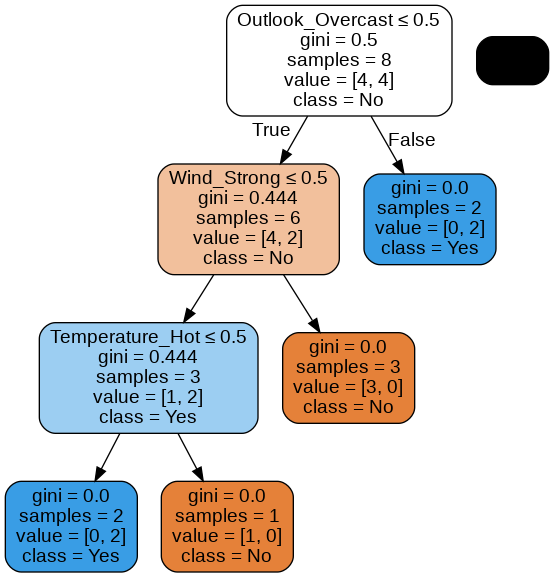

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente, tanto no conjunto de treinamento quanto no conjunto de testes:


In [ ]:
# Usando modelo para classificar os dados que temos a disposição

# Predição dos dados usados para o treinamento
y_train_pred = clf.predict(X_train)

# Predição dos dados do conjunto de teste
y_test_pred = clf.predict(X_test)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Train Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


A acurácia obtida para o conjunto de treinamento foi 1, conforme esperávamos, indicando que classificamos corretamente todos os exemplos de nosso conjunto usado para o treinamento do classificador. 

Por outro lado, a acurácia do conjunto de teste é menor do que 1 (0.66) porque erramos algumas classificações do conjunto de teste feitas com base no classificador, que foi treinado com 60% do conjunto de dados original. 

Ao variarmos o parâmetro *random_state* da função que faz o split dos dados do conjunto, estamos variando o nível de embaralhamento dos dados antes de realizar a divisão do conjunto em treinamento e teste. Quando colocamos um valor fixo para o random_state, estamos fixando o nível de embaralhamento antes da divisão dos dados. Ao variarmos esse parâmetro variamos também a acurácia porque os dados utilizados serão variados.

#### **ii. 80% treinamento e 20% teste**

In [ ]:
# Dividimos o conjunto de exemplos Xone_hot_data em conjuntos de treinamento (0.8) e teste (0.2)
X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, train_size = 0.8, test_size = 0.2, random_state=1)

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

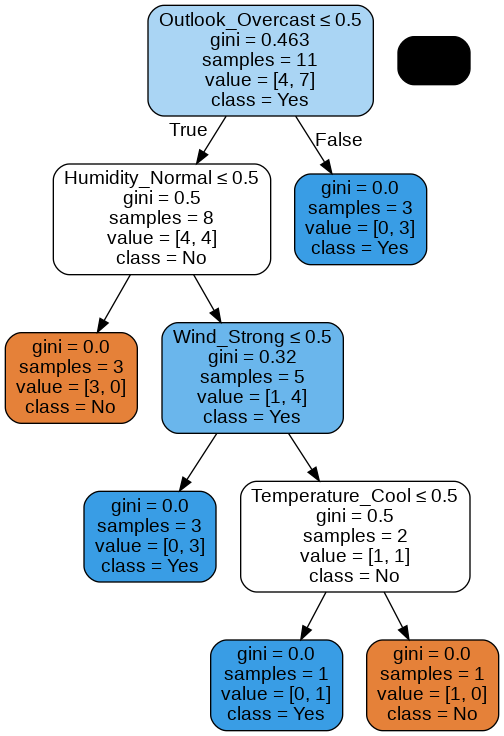

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente, tanto no conjunto de treinamento quanto no conjunto de testes:

In [ ]:
# Usando modelo para classificar os dados que temos a disposição

# Predição dos dados usados para o treinamento
y_train_pred = clf.predict(X_train)

# Predição dos dados do conjunto de teste
y_test_pred = clf.predict(X_test)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Train Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


A acurácia obtida para o conjunto de treinamento foi 1, conforme esperávamos, indicando que classificamos corretamente todos os exemplos de nosso conjunto usado para o treinamento do classificador. 

Por outro lado, a acurácia do conjunto de teste é menor do que 1 (0.66) porque erramos algumas classificações do conjunto de teste feitas com base no classificador, que foi treinado com 80% do conjunto de dados original. 

Ao variarmos o parâmetro *random_state* da função que faz o split dos dados do conjunto, estamos variando o nível de embaralhamento dos dados antes de realizar a divisão do conjunto em treinamento e teste. Quando colocamos um valor fixo para o random_state, estamos fixando o nível de embaralhamento antes da divisão dos dados. Ao variarmos esse parâmetro variamos também a acurácia porque os dados utilizados serão variados.

#### **iii. 100% treinamento e 0% teste (aula)**

In [ ]:
# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(Xone_hot_data, y)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

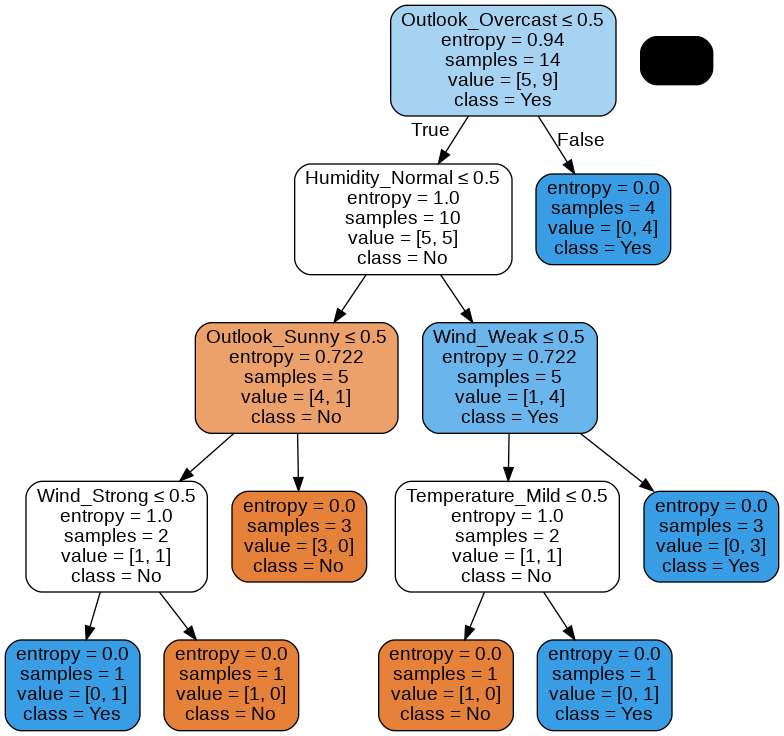

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente:


In [ ]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(Xone_hot_data)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


A acurácia obtida para o conjunto de dados foi 1, conforme esperávamos, indicando que classificamos corretamente todos os dados, visto que todos foram usados para treinamento.

#### **iv. Comparação de árvores**

Em geral, percebemos que a árvore do caso em que todo o conjunto de dados (100% das instâncias) é usado para treinamento é maior do que nos outros casos, como se os outros casos fossem uma variação dessa árvore com menos especificidades e mais generalizações.

# Questão 02


---



Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo o **índice Gini**.

In [ ]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="gini")

 Iremos dividir nosso conjunto de exemplos de três formas distintas:

#### **i. 60% treinamento e 40% teste**

In [ ]:
# Dividimos o conjunto de exemplos Xone_hot_data em conjuntos de treinamento (0.6) e teste (0.4)
X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, train_size = 0.6, test_size = 0.4, random_state=1)

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

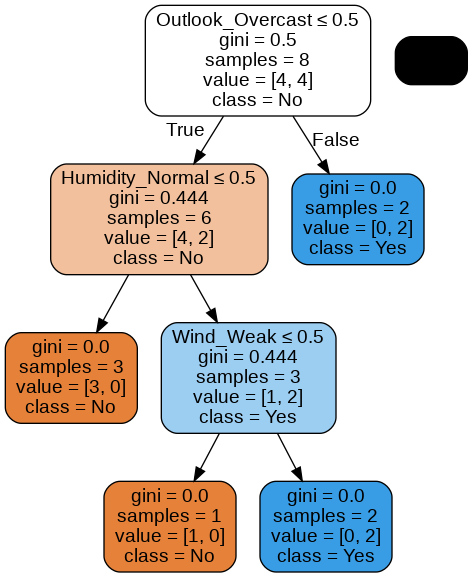

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente, tanto no conjunto de treinamento quanto no conjunto de testes:


In [ ]:
# Usando modelo para classificar os dados que temos a disposição

# Predição dos dados usados para o treinamento
y_train_pred = clf.predict(X_train)

# Predição dos dados do conjunto de teste
y_test_pred = clf.predict(X_test)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Train Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


A acurácia obtida para o conjunto de treinamento foi 1, conforme esperávamos, indicando que classificamos corretamente todos os exemplos de nosso conjunto usado para o treinamento do classificador. 

Por outro lado, a acurácia do conjunto de teste é menor do que 1 (0.66) porque erramos algumas classificações do conjunto de teste feitas com base no classificador, que foi treinado com 60% do conjunto de dados original. 

Ao variarmos o parâmetro *random_state* da função que faz o split dos dados do conjunto, estamos variando o nível de embaralhamento dos dados antes de realizar a divisão do conjunto em treinamento e teste. Quando colocamos um valor fixo para o random_state, estamos fixando o nível de embaralhamento antes da divisão dos dados. Ao variarmos esse parâmetro variamos também a acurácia porque os dados utilizados serão variados.

#### **ii. 80% treinamento e 20% teste**

In [ ]:
# Dividimos o conjunto de exemplos Xone_hot_data em conjuntos de treinamento (0.8) e teste (0.2)
X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, train_size = 0.8, test_size = 0.2, random_state=1)

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

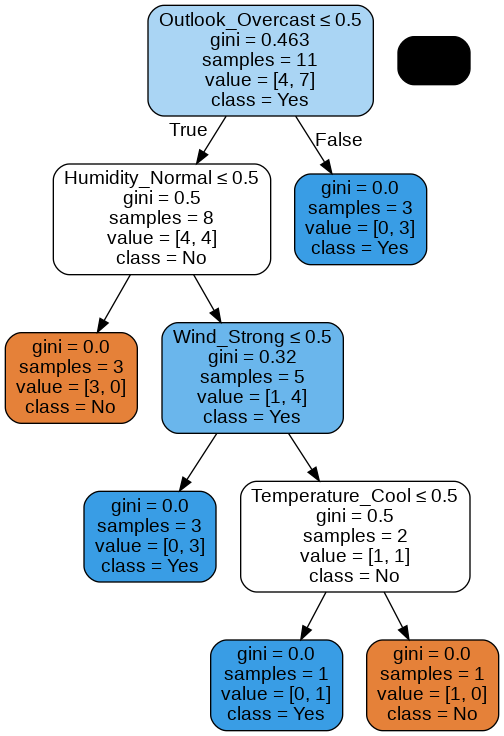

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente, tanto no conjunto de treinamento quanto no conjunto de testes:

In [ ]:
# Usando modelo para classificar os dados que temos a disposição

# Predição dos dados usados para o treinamento
y_train_pred = clf.predict(X_train)

# Predição dos dados do conjunto de teste
y_test_pred = clf.predict(X_test)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Train Set Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


A acurácia obtida para o conjunto de treinamento foi 1, conforme esperávamos, indicando que classificamos corretamente todos os exemplos de nosso conjunto usado para o treinamento do classificador. 

Por outro lado, a acurácia do conjunto de teste é menor do que 1 (0.66) porque erramos algumas classificações do conjunto de teste feitas com base no classificador, que foi treinado com 80% do conjunto de dados original. 

Ao variarmos o parâmetro *random_state* da função que faz o split dos dados do conjunto, estamos variando o nível de embaralhamento dos dados antes de realizar a divisão do conjunto em treinamento e teste. Quando colocamos um valor fixo para o random_state, estamos fixando o nível de embaralhamento antes da divisão dos dados. Ao variarmos esse parâmetro variamos também a acurácia porque os dados utilizados serão variados.

#### **iii. 100% treinamento e 0% teste (aula)**

In [ ]:
# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(Xone_hot_data, y)

##### **1. Árvore de decisão**

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

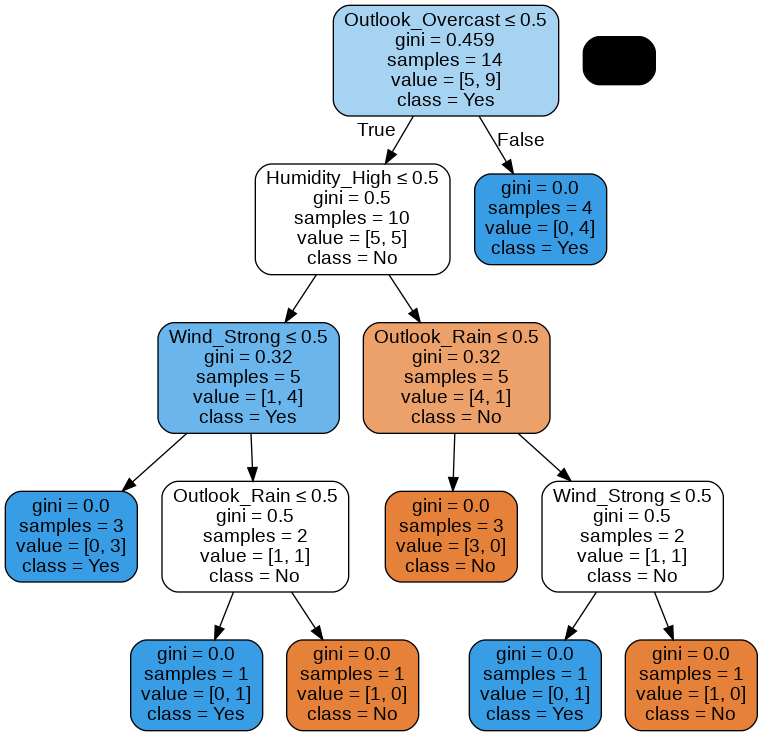

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

##### **2. Acurácia**

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente:


In [ ]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(Xone_hot_data)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


A acurácia obtida para o conjunto de dados foi 1, conforme esperávamos, indicando que classificamos corretamente todos os dados, visto que todos foram usados para treinamento.

#### **iv. Comparação de árvores**

Da mesma forma que na questão anterior, percebemos que a árvore do caso em que todo o conjunto de dados (100% das instâncias) é usado para treinamento é maior do que nos outros casos, como se os outros casos fossem uma variação dessa árvore com menos especificidades e mais generalizações.

#### **Tabela comparativa**


Podemos colocar a acurácia obtida em cada um dos casos em uma tabela, de forma que fique fácil compararmos o que está acontecendo em cada caso.Conforme pudemos perceber nas execuções feitas acima, no caso desse conjunto de dados (dataset) em específico, não está havendo diferença entre escolher o índice Gini e a entropia como forma de selecionar os atributos, por isso as árvores e as acurácias foram iguais em casos análogos.

| Treinamento / Teste |  Entropia | Gini  |
|---|---|---|
| 60% / 40%  |  1.0 / 0.66 | 1.0 / 0.66  |
|  80% / 20% |  1.0 / 0.66 | 1.0 / 0.66  |
| 100% / 0%  |  1.0 / 1.0  | 1.0 / 1.0  |

# Questão 03


---



Podemos fazer o treinamento usando a validação cruzada k-fold. Para isso, vamos utilizar os valores de k $\in$ [3, 8, 14] e as funções **KFold**, que fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste, e **cross_val_score**, que avalia uma pontuação por validação cruzada, ambas da lib sklearn.model_selection. 

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")

k_list = [3, 8, 14]
for k  in k_list:
    k_fold = KFold(n_splits=k, shuffle=True, random_state=1)

    print("---","{}-fold: ".format(k),"---")

    mean_train = 0
    mean_test = 0
    length = 0

    for train_index, test_index in k_fold.split(X):
        # Obtem os dados divididos usando os dados do KFold
        X_train, X_test = Xone_hot_data.iloc[train_index], Xone_hot_data.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Treinando com os dados do conjunto de treinamento
        clf = clf.fit(X_train, y_train)

        # Predição dos dados de treinamento
        y_pred_train = clf.predict(X_train)

        # Predição dos dados de teste
        y_pred_test = clf.predict(X_test)

        # Obtem as acuracias e soma na media
        mean_train += metrics.accuracy_score(y_train, y_pred_train)
        mean_test += metrics.accuracy_score(y_test, y_pred_test)

        length += 1

    print("Treinamento: {}".format(mean_train/length))
    print("Teste: {} \n".format(mean_test/length))

--- 3-fold:  ---
Treinamento: 1.0
Teste: 0.3666666666666667 

--- 8-fold:  ---
Treinamento: 1.0
Teste: 0.4375 

--- 14-fold:  ---
Treinamento: 1.0
Teste: 0.5714285714285714 



Pudemos observar que a acurácia foi aumentando à medida que o valor de k também aumentava.